In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
%matplotlib inline

In [2]:
endpoint_crashes = 'https://data.cityofchicago.org/resource/85ca-t3if.geojson?$select=crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,first_crash_type,trafficway_type,lane_cnt,road_defect,prim_contributory_cause,sec_contributory_cause,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,street_no,street_direction,street_name,latitude,longitude,location&$limit=650000'
res = requests.get(endpoint_crashes)
res = res.json()

In [3]:
crashes_df = gpd.GeoDataFrame.from_features(res['features'])

In [4]:
crashes_df.set_crs(crs='EPSG:4326', inplace=True)

geometry injuries_fatal injuries_non_incapacitating  \
0       POINT (-87.60910 41.71275)              0                           0   
1       POINT (-87.61972 41.90081)              0                           0   
2       POINT (-87.70108 41.69478)              0                           0   
3       POINT (-87.61993 41.90096)              0                           0   
4       POINT (-87.66862 41.93462)              0                           0   
...                            ...            ...                         ...   
638922  POINT (-87.72447 41.83589)              0                           0   
638923  POINT (-87.70114 41.88402)              0                           0   
638924  POINT (-87.56195 41.76071)              0                           1   
638925  POINT (-87.63876 41.88561)              0                           0   
638926  POINT (-87.70874 41.97586)              0                           0   

                                          crash_record_id  \
0       6002c74fc432c6577f40b63b53f8ad267b5968056c3aa4...   
1       088119de3ced1d8a832df364262aef130d824d300832c6...   
2       3954faec373da19563b7300f3aa88fa97112dda73b4679...   
3       d772d78e324abd01b4c5e08b98981f8b01e08eb13e8ca8...   
4       2d55266961ce225c90a2a15104103a833b05babc741130...   
...                                                   ...   
638922  964aaaeb569e364886cfbdf89ca73e09ca15cd916d87b2...   
638923  1d0232afecbdfd01968555aa956a688fd6f55a2bd1984f...   
638924  957783a4787318f005a7dbc920e4c84cb9ac8aa7329a62...   
638925  f62e27317feb174811cf4fefeb9fa1064fea6c0619a873...   
638926  a802658be15312809c771559e4f81088cfb226830792a5...   

       injuries_incapacitating injuries_no_indication      latitude street_no  \
0                            0                      1  41.712748696       599   
1                            0                      1   41.90080611       990   
2                            0                      1  41.694784754     10912   
3                            0                      1  41.900958919      1000   
4                            1                      1  41.934620423      2912   
...                        ...                    ...           ...       ...   
638922                       0                      2  41.835886103      3132   
638923                       0                      2  41.884016475       199   
638924                       0                      1  41.760710194      7400   
638925                       0                      2  41.885609917       415   
638926                       0                      1  41.975856916      3200   

       injuries_unknown      device_condition  ... crash_hour  \
0                     0           NO CONTROLS  ...          1   
1                     0           NO CONTROLS  ...          1   
2                     0           NO CONTROLS  ...          0   
3                     0           NO CONTROLS  ...          0   
4                     0           NO CONTROLS  ...          0   
...                 ...                   ...  ...        ...   
638922                0           NO CONTROLS  ...         19   
638923                0  FUNCTIONING PROPERLY  ...         19   
638924                0           NO CONTROLS  ...          7   
638925                0           NO CONTROLS  ...         18   
638926                0  FUNCTIONING PROPERLY  ...         16   

                    first_crash_type injuries_reported_not_evident  \
0               PARKED MOTOR VEHICLE                             0   
1                       FIXED OBJECT                             0   
2               PARKED MOTOR VEHICLE                             0   
3                       FIXED OBJECT                             0   
4                       FIXED OBJECT                             0   
...                              ...                           ...   
638922      SIDESWIPE SAME DIRECTION                             0   
638923

In [5]:
#filter out crashes where there was debris on roadway
crashes_df = crashes_df.loc[crashes_df['road_defect'] != 'DEBRIS ON ROADWAY'] 
#filter out crashes where the traffic control device was functioning improperly or not functioning
device_not_working = ['FUNCTIONING IMPROPERLY','NOT FUNCTIONING']
crashes_df = crashes_df.loc[~crashes_df['device_condition'].isin(device_not_working)]
#there is one row in there with POINT of (0,0) and it throws off plotting the map later on, so get rid of it
crashes_df = crashes_df[crashes_df['geometry'].x != 0]
#filter out null geometries
crashes_df = crashes_df[crashes_df['geometry'].notna()]

In [6]:
crashes_df['injuries_fatal'] = pd.to_numeric(crashes_df['injuries_fatal'])
crashes_df['injuries_non_incapacitating'] = pd.to_numeric(crashes_df['injuries_non_incapacitating'])
crashes_df['injuries_no_indication'] = pd.to_numeric(crashes_df['injuries_no_indication'])
crashes_df['injuries_incapacitating'] = pd.to_numeric(crashes_df['injuries_incapacitating'])
crashes_df['injuries_unknown'] = pd.to_numeric(crashes_df['injuries_unknown'])
crashes_df['injuries_total'] = pd.to_numeric(crashes_df['injuries_total'])
crashes_df['injuries_reported_not_evident'] = pd.to_numeric(crashes_df['injuries_reported_not_evident'])

In [7]:
crashes_df

geometry  injuries_fatal  \
0       POINT (-87.60910 41.71275)             0.0   
1       POINT (-87.61972 41.90081)             0.0   
2       POINT (-87.70108 41.69478)             0.0   
3       POINT (-87.61993 41.90096)             0.0   
4       POINT (-87.66862 41.93462)             0.0   
...                            ...             ...   
638922  POINT (-87.72447 41.83589)             0.0   
638923  POINT (-87.70114 41.88402)             0.0   
638924  POINT (-87.56195 41.76071)             0.0   
638925  POINT (-87.63876 41.88561)             0.0   
638926  POINT (-87.70874 41.97586)             0.0   

        injuries_non_incapacitating  \
0                               0.0   
1                               0.0   
2                               0.0   
3                               0.0   
4                               0.0   
...                             ...   
638922                          0.0   
638923                          0.0   
638924                          1.0   
638925                          0.0   
638926                          0.0   

                                          crash_record_id  \
0       6002c74fc432c6577f40b63b53f8ad267b5968056c3aa4...   
1       088119de3ced1d8a832df364262aef130d824d300832c6...   
2       3954faec373da19563b7300f3aa88fa97112dda73b4679...   
3       d772d78e324abd01b4c5e08b98981f8b01e08eb13e8ca8...   
4       2d55266961ce225c90a2a15104103a833b05babc741130...   
...                                                   ...   
638922  964aaaeb569e364886cfbdf89ca73e09ca15cd916d87b2...   
638923  1d0232afecbdfd01968555aa956a688fd6f55a2bd1984f...   
638924  957783a4787318f005a7dbc920e4c84cb9ac8aa7329a62...   
638925  f62e27317feb174811cf4fefeb9fa1064fea6c0619a873...   
638926  a802658be15312809c771559e4f81088cfb226830792a5...   

        injuries_incapacitating  injuries_no_indication      latitude  \
0                           0.0                     1.0  41.712748696   
1                           0.0                     1.0   41.90080611   
2                           0.0                     1.0  41.694784754   
3                           0.0                     1.0  41.900958919   
4                           1.0                     1.0  41.934620423   
...                         ...                     ...           ...   
638922                      0.0                     2.0  41.835886103   
638923                      0.0                     2.0  41.884016475   
638924                      0.0                     1.0  41.760710194   
638925                      0.0                     2.0  41.885609917   
638926                      0.0                     1.0  41.975856916   

       street_no  injuries_unknown      device_condition  ... crash_hour  \
0            599               0.0           NO CONTROLS  ...          1   
1            990               0.0           NO CONTROLS  ...          1   
2          10912               0.0           NO CONTROLS  ...          0   
3           1000               0.0           NO CONTROLS  ...          0   
4           2912               0.0           NO CONTROLS  ...          0   
...          ...               ...                   ...  ...        ...   
638922      3132               0.0           NO CONTROLS  ...         19   
638923       199               0.0  FUNCTIONING PROPERLY  ...         19   
638924      7400               0.0           NO CONTROLS  ...          7   
638925       415               0.0           NO CONTROLS  ...         18   
638926      3200               0.0  FUNCTIONING PROPERLY  ...         16   

                    first_crash_type injuries_reported_not_evident  \
0               PARKED MOTOR VEHICLE                           0.0   
1                       FIXED OBJECT                           0.0   
2               PARKED MOTOR VEHICLE                           0.0   
3                       FIXED OBJECT                           0.0   
4                       FIXED OBJEC

## get pedestrians from the people API, clean

In [8]:
endpoint_people = 'https://data.cityofchicago.org/resource/u6pd-qa9d.json?person_type=PEDESTRIAN&$limit=16000'
res = requests.get(endpoint_people)
res = res.json()
peds_df = pd.DataFrame(res)

In [9]:
#remove peds who were impaired by drugs or alcohol or both
#DON'T filter in ['NORMAL','UNKNOWN','REMOVED BY EMS','OTHER','EMOTIONAL'] b/c you lose 1000 NaNs 
#instead, filter OUT with impaired_list and ~

impaired_list = ['IMPAIRED - ALCOHOL',
'HAD BEEN DRINKING',
'IMPAIRED - DRUGS',
'IMPAIRED - ALCOHOL AND DRUGS',
'FATIGUED/ASLEEP',
'ILLNESS/FAINTED',
'MEDICATED']
peds_df = peds_df.loc[~peds_df['physical_condition'].isin(impaired_list)]

In [10]:
peds_df['physical_condition'].value_counts()

NORMAL            10322
UNKNOWN            2586
REMOVED BY EMS     1008
OTHER               287
EMOTIONAL            97
Name: physical_condition, dtype: int64

In [11]:
## inner join crashes_df and peds_df

In [12]:
print(crashes_df.columns)
peds_df.columns

#join on crash_record_id
#only need 1 crash_date

Index(['geometry', 'injuries_fatal', 'injuries_non_incapacitating',
       'crash_record_id', 'injuries_incapacitating', 'injuries_no_indication',
       'latitude', 'street_no', 'injuries_unknown', 'device_condition',
       'crash_date', 'trafficway_type', 'traffic_control_device',
       'road_defect', 'longitude', 'crash_month', 'street_name',
       'crash_day_of_week', 'crash_hour', 'first_crash_type',
       'injuries_reported_not_evident', 'most_severe_injury',
       'prim_contributory_cause', 'sec_contributory_cause', 'street_direction',
       'posted_speed_limit', 'injuries_total', 'lane_cnt'],
      dtype='object')


Index(['person_id', 'person_type', 'crash_record_id', 'crash_date', 'city',
       'state', 'zipcode', 'sex', 'age', 'injury_classification', 'hospital',
       'ems_agency', 'driver_vision', 'physical_condition', 'pedpedal_action',
       'pedpedal_visibility', 'pedpedal_location', 'bac_result',
       'safety_equipment', 'driver_action', 'rd_no', 'cell_phone_use',
       'bac_result_value'],
      dtype='object')

In [13]:
#leave out some peds_df columns that are not relevant
peds_df = peds_df[['person_id', 'person_type', 'crash_record_id', 'city',
       'state', 'zipcode', 'sex', 'age', 'injury_classification',
       'driver_vision', 'physical_condition', 'pedpedal_action',
       'pedpedal_visibility', 'pedpedal_location',
       'safety_equipment', 'driver_action', 'cell_phone_use']]

In [14]:
crashes_peds_joined_df = pd.merge(crashes_df, peds_df, 
                    left_on = 'crash_record_id', right_on = 'crash_record_id', #this line is equivalent to SQL "ON df_1.column = df_2.column"
                    how = 'inner')

In [15]:
#this is the "mega table" with ALL instances of pedestrian crashes (from people) augmented with information from crashes
#sometimes there are multiple rows with the same crash_record_ids b/c there were multiple pedestrians involved
crashes_peds_joined_df.to_csv('crashes_peds_joined.csv')

### in order to graph a count of crashes by pedpedal location, we need to groupby and aggregate 
### this is the "frequency and pedpedal location" chart. below is severity and pedpedal location

In [16]:
pedpedal_location = crashes_peds_joined_df.groupby('pedpedal_location')['crash_record_id'].agg('count').to_frame().reset_index()

In [17]:
pedpedal_location

pedpedal_location  crash_record_id
0         BIKE LANE               22
1           BIKEWAY               46
2   DRIVEWAY ACCESS              242
3      IN CROSSWALK             7002
4        IN ROADWAY             5478
5    NOT IN ROADWAY              833
6          SHOULDER               69
7        UNKNOWN/NA             1402

In [18]:
pedpedal_location = pedpedal_location.sort_values('crash_record_id',ascending=False)
pedpedal_location.columns = ['Pedestrian Location','Count']

In [19]:
#gourds_df.groupby('year')['weight'].agg('max').to_frame().reset_index()

Text(0.5, 1.0, 'Auto/Pedestrian Crashes by Location')

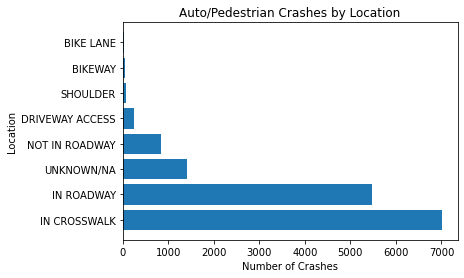

In [20]:
plt.barh('Pedestrian Location', 'Count', data=pedpedal_location)
plt.xlabel("Number of Crashes")
plt.ylabel("Location")
plt.title("Auto/Pedestrian Crashes by Location")
#ok so what's going on with the ones that happen "in the roadway"? is it b/c there is no crosswalk?

In [21]:
in_roadway = crashes_peds_joined_df[crashes_peds_joined_df['pedpedal_location'] == 'IN ROADWAY']
in_roadway['pedpedal_action'].value_counts()
#what does this mean? the location of the pedestrian was "in the roadway" but the "action" could still be something
#like "crossing with signal" or "crossing no controls at intersection"

OTHER ACTION                                         879
CROSSING - NO CONTROLS (NOT AT INTERSECTION)         797
NOT AT INTERSECTION                                  632
UNKNOWN/NA                                           528
STANDING IN ROADWAY                                  492
CROSSING - WITH SIGNAL                               387
CROSSING - AGAINST SIGNAL                            308
WITH TRAFFIC                                         241
AGAINST TRAFFIC                                      209
CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION)    185
NO ACTION                                            181
CROSSING - NO CONTROLS (AT INTERSECTION)             172
PARKED VEHICLE                                       171
WORKING IN ROADWAY                                   119
PLAYING IN ROADWAY                                    80
ENTER FROM DRIVE/ALLEY                                42
INTOXICATED PED/PEDAL                                 20
PLAYING/WORKING ON VEHICLE     

In [22]:
#trying to explore what ped crashes in roadway are...so I mapped it
area_center = [41.881288,-87.686729]
in_roadway_map = folium.Map(location =  area_center, zoom_start = 11)
marker_cluster = MarkerCluster().add_to(in_roadway_map)
#folium.GeoJson(crashes_fatal_df).add_to(fatal_cluster_map)

for row_index, row_values in in_roadway.iterrows():
    loc = (row_values['geometry'].y, row_values['geometry'].x)
    pop = row_values['trafficway_type'], row_values['traffic_control_device'],row_values['crash_date']
    icon=folium.Icon(color="blue",icon='user', prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon)
    
    marker.add_to(marker_cluster)


in_roadway_map

### let's make a clustered bar chart showing severity of injury and pedpedal location

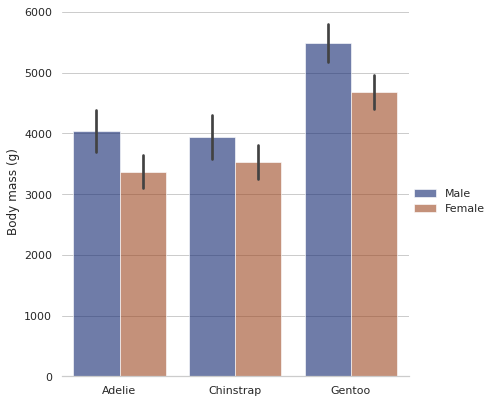

In [23]:
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")